In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
print('Done')

Done


In [70]:
df = pd.read_csv('reviews.csv')
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [71]:
df1 = pd.read_csv('listings.csv')
df1.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [72]:
df2 = pd.read_csv('calendar.csv')
df2.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [73]:
df2 = df2.drop_duplicates(subset = ['listing_id'], keep = 'first')
df2.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
365,953595,2016-01-04,t,$125.00
730,3308979,2016-01-04,t,$975.00
1095,7421966,2016-01-04,f,NaN
1460,278830,2016-01-04,t,$600.00


In [74]:
df2 = df2.set_index('listing_id')
df1 = df1.set_index('id')


In [76]:
df1['price']

id
241032       $85.00
953595      $150.00
3308979     $975.00
7421966     $100.00
278830      $450.00
             ...   
8101950     $359.00
8902327      $79.00
10267360     $93.00
9604740      $99.00
10208623     $87.00
Name: price, Length: 3818, dtype: object

In [82]:
prices = list()
for i in df1['price']:
    i = i[1:]
    try:
        i = float(i)
    except:
        i = 1000
    prices.append(i)
df1['price'] = prices
df1['price'].head()

id
241032      85.0
953595     150.0
3308979    975.0
7421966    100.0
278830     450.0
Name: price, dtype: float64

In [83]:
df1.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square

<AxesSubplot:xlabel='zipcode', ylabel='price'>

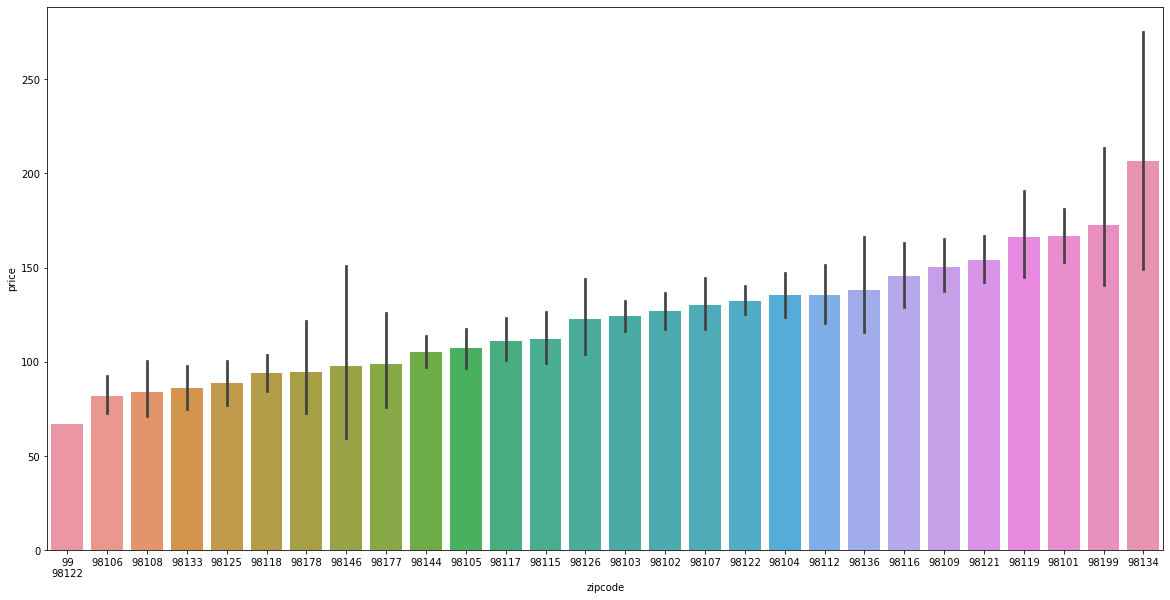

In [152]:
import matplotlib.pyplot as plt
result = df1.groupby(['zipcode'])['price'].aggregate(np.mean).reset_index().sort_values('price')
figsize = (20,10)
fig, ax = plt.subplots(figsize = figsize)
cities = ['Seattle','Bellard, Seattle','West Seattle','Seattle city','Phinney Ridge Seattle', 'seattle']
sns.barplot(x = 'zipcode',y = 'price', data = df1, order = result['zipcode'])


<AxesSubplot:xlabel='bed_type', ylabel='price'>

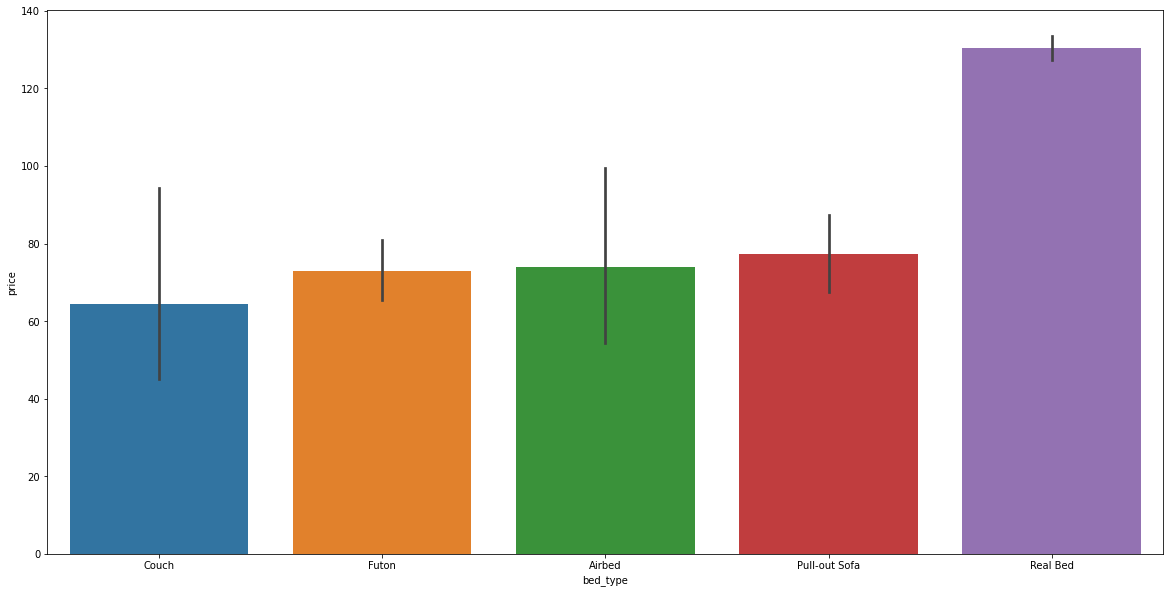

In [153]:
import matplotlib.pyplot as plt
results = df1.groupby(['bed_type'])['price'].aggregate(np.mean).reset_index().sort_values('price')
figsize = (20,10)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'bed_type',y = 'price', data = df1, order = results['bed_type'])

<AxesSubplot:xlabel='review_scores_value', ylabel='price'>

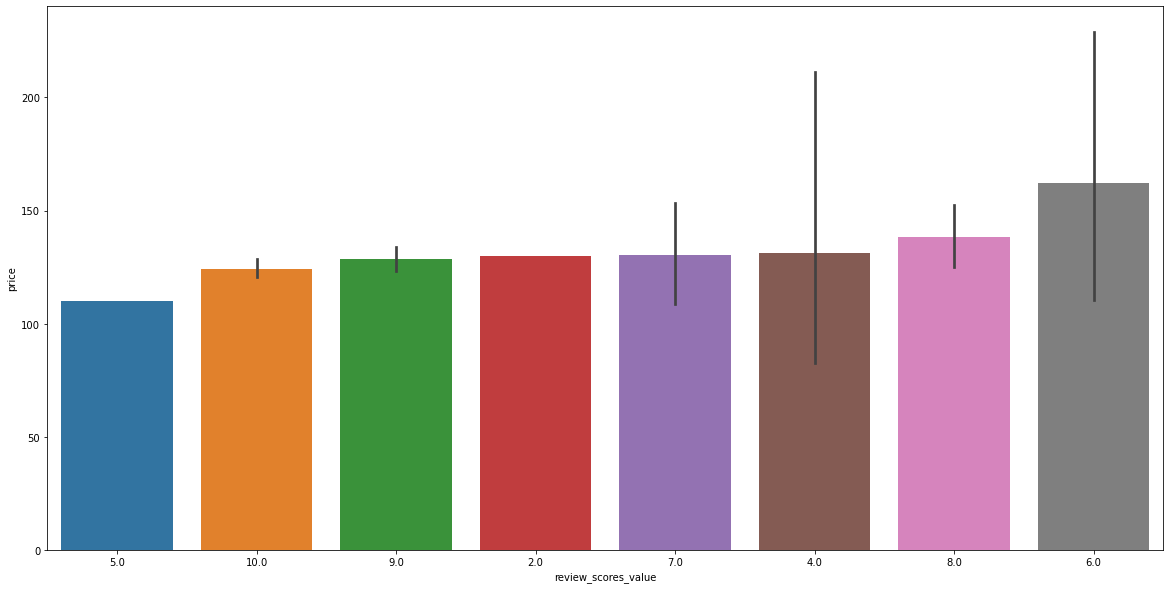

In [154]:
import matplotlib.pyplot as plt
results = df1.groupby(['review_scores_value'])['price'].aggregate(np.mean).reset_index().sort_values('price')
figsize = (20,10)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'review_scores_value',y = 'price', data = df1, order = results['review_scores_value'])

<AxesSubplot:xlabel='review_scores_cleanliness', ylabel='price'>

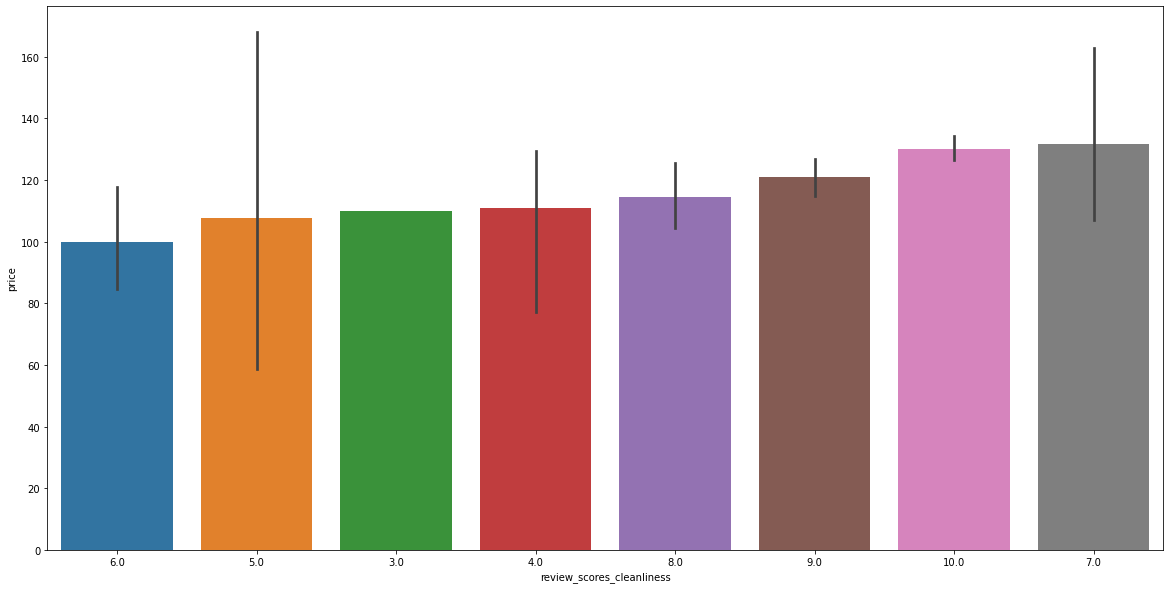

In [156]:
import matplotlib.pyplot as plt
results = df1.groupby(['review_scores_cleanliness'])['price'].aggregate(np.mean).reset_index().sort_values('price')
figsize = (20,10)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'review_scores_cleanliness',y = 'price', data = df1, order = results['review_scores_cleanliness'])

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

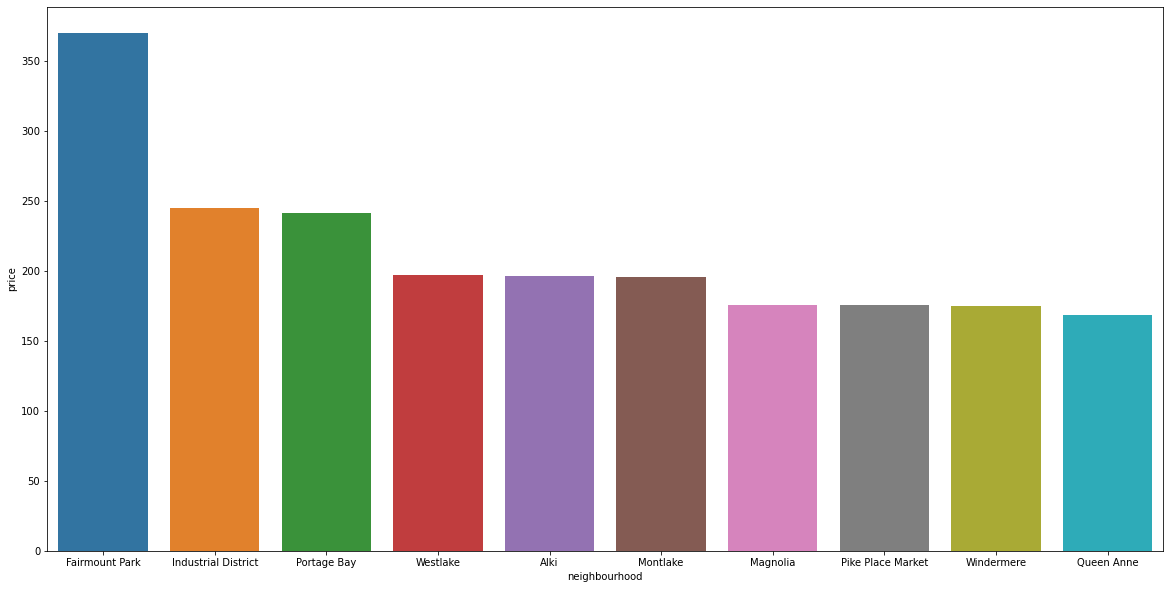

In [165]:
results = df1.groupby(['neighbourhood'])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending = False)
results = results.iloc[0:10,:]
figsize = (20,10)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'neighbourhood',y = 'price', data = results, order = results['neighbourhood'])

In [220]:
df3 = pd.cut(df1['beds'], bins = 3, labels = ['Low # of Beds', 'Mid # of Beds','High # of Beds'])
result = pd.DataFrame(result)
result.shape

(7636, 1)

In [228]:
result.rename(columns = {0:'Bed Bins'}, inplace = True)
result = result.iloc[:3818,:]
result.head(3818)

,Bed Bins
id,
241032,Low # of Beds
953595,Low # of Beds
3308979,Average # of Beds
7421966,Low # of Beds
278830,Low # of Beds
...,...
8101950,Low # of Beds
8902327,Low # of Beds
10267360,Low # of Beds


In [229]:
price_list = list()
for i in df1['price']:
    price_list.append(i)

In [230]:
result['prices'] = price_list

In [231]:
result.head()

,Bed Bins,prices
id,,
241032,Low # of Beds,85.0
953595,Low # of Beds,150.0
3308979,Average # of Beds,975.0
7421966,Low # of Beds,100.0
278830,Low # of Beds,450.0


<AxesSubplot:xlabel='Bed Bins', ylabel='prices'>

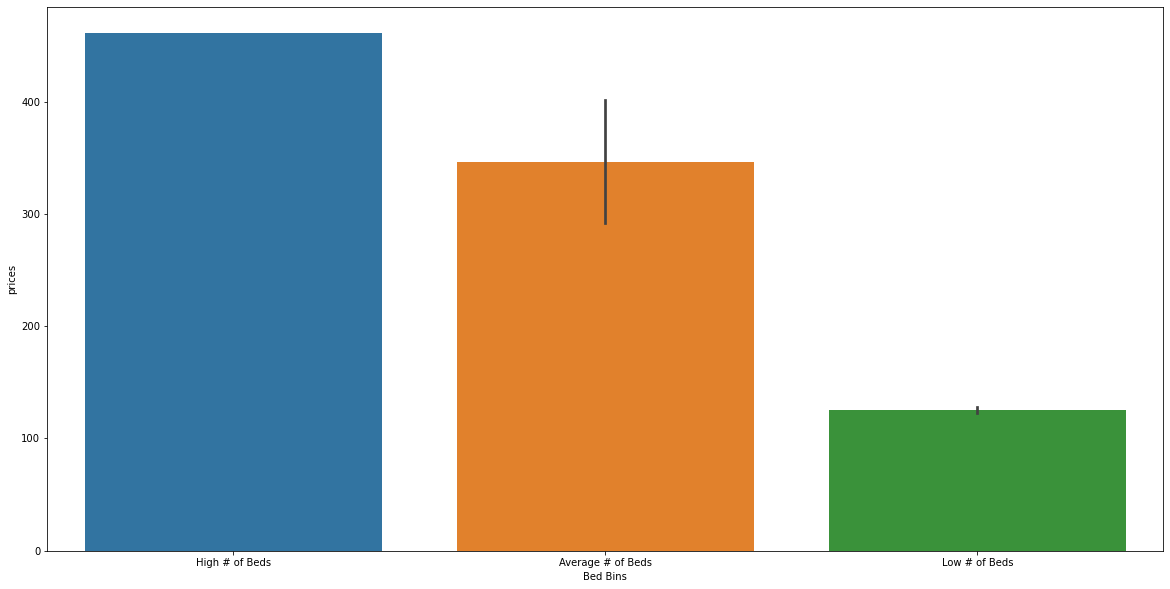

In [233]:
fin_res = result.groupby('Bed Bins')['prices'].aggregate(np.mean).reset_index().sort_values('prices', ascending = False)
figsize = (20,10)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'Bed Bins',y = 'prices', data = result, order = fin_res['Bed Bins'])

In [242]:
host_listing_binned = pd.cut(df1['host_listings_count'], bins = 3, labels = ['Low # of Listings', 'Middle # of Listings','High # of Listings'])
host_listing_binned = pd.DataFrame(host_listing_binned)

host_listing_binned = host_listing_binned.iloc[:3818,:]
host_listing_binned['price'] = price_list
host_listing_binned.head()

,host_listings_count,price
id,,
241032,Low # of Listings,85.0
953595,Low # of Listings,150.0
3308979,Low # of Listings,975.0
7421966,Low # of Listings,100.0
278830,Low # of Listings,450.0


<AxesSubplot:xlabel='host_listings_count', ylabel='price'>

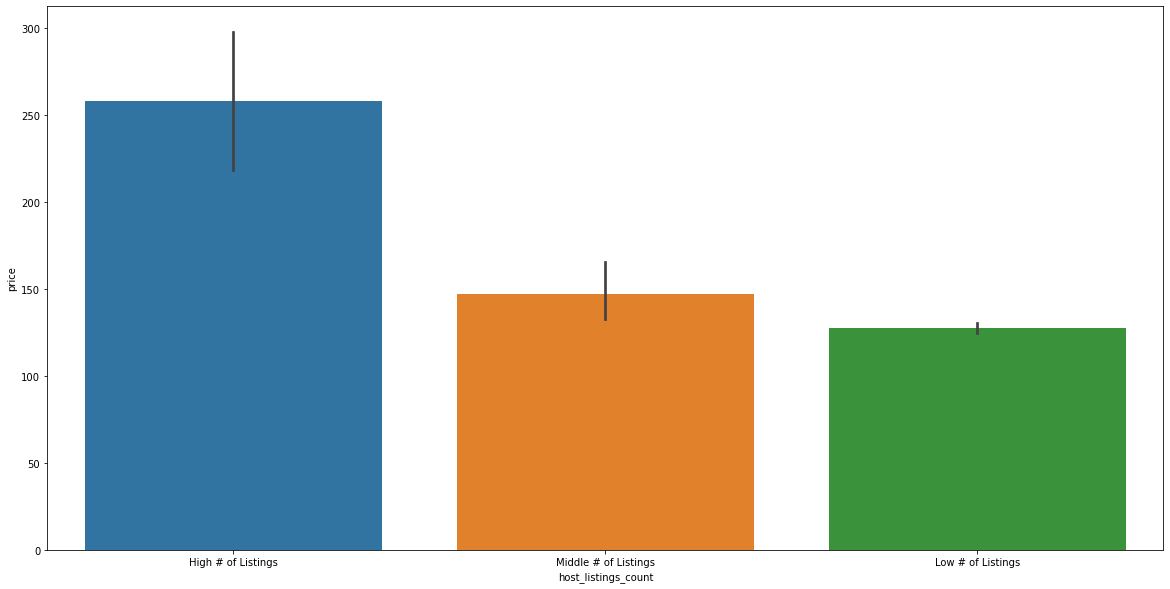

In [244]:
reslt = host_listing_binned.groupby('host_listings_count')['price'].aggregate(np.mean).reset_index().sort_values('price', ascending = False)
figsize = (20,10)
fig, ax = plt.subplots(figsize = figsize)
sns.barplot(x = 'host_listings_count',y = 'price', data = host_listing_binned, order = reslt['host_listings_count'])

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

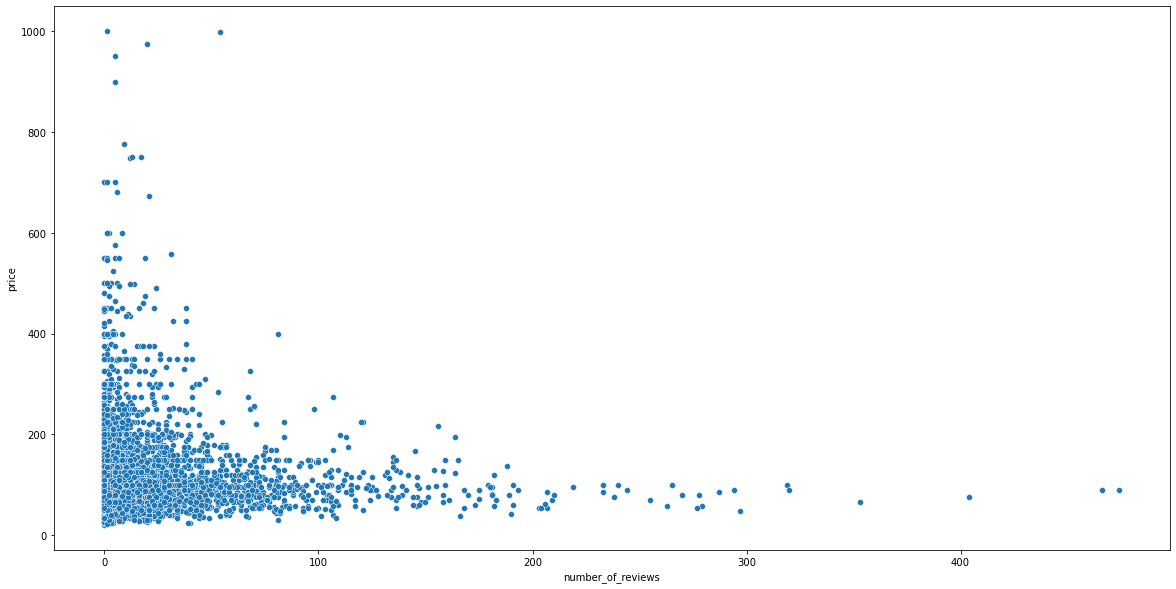

In [245]:
figsize = (20,10)
fig, ax = plt.subplots(figsize = figsize)
sns.scatterplot(x = 'number_of_reviews', y = 'price',data = df1)

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

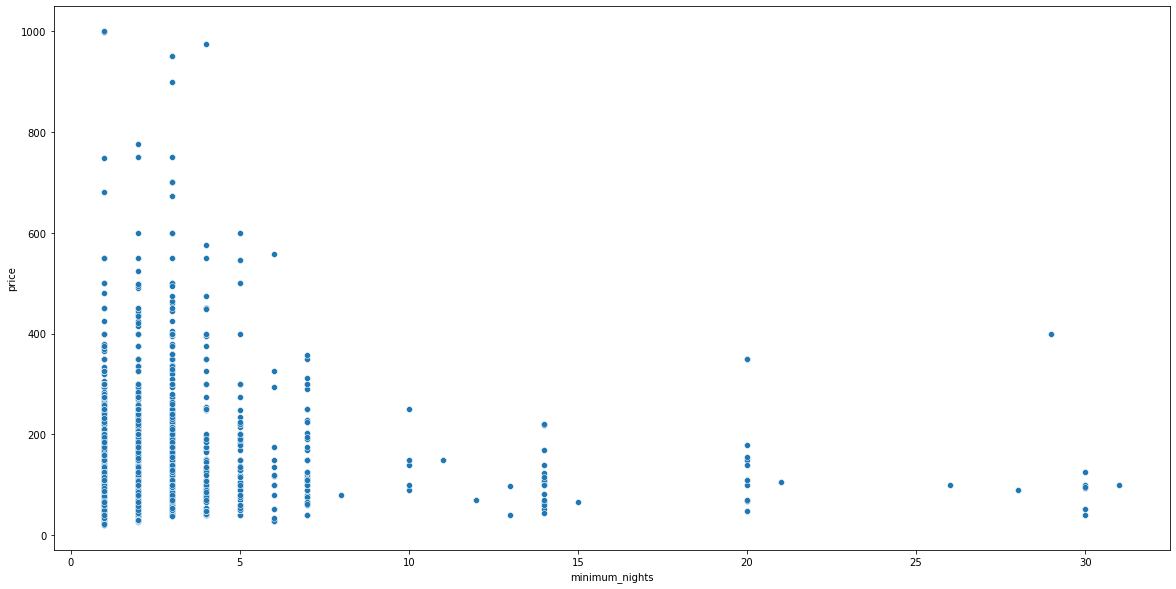

In [249]:
df6 = df1[df1.minimum_nights<=50]
figsize = (20,10)
fig, ax = plt.subplots(figsize = figsize)
sns.scatterplot(x = 'minimum_nights', y = 'price',data = df6)